In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart_2020_cleaned.csv


In [2]:
## Cargamos los datos y los visualizamos.
data=pd.read_csv('/kaggle/input/heart-disease/heart_2020_cleaned.csv')
df=data.copy()
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# **Análisis y Exploración de los datos de los datos**

## Nombres de las características
Acá podemos obsevar el nombre de cada una de las características que tienene el dataset y son evaluadas para verificar si una persona ha sufrido de ataque cardíaco.

In [3]:
# Nombre de las columnas de nuestros datos
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## Dimensiones del dataset
1. Observamos que tenemos 17 variables en nuestro dataset. 16 son utilizadas para entrenar el modelo y una adicional que esla variable a predecir.  
2. Tenemos  319795 muestras en el dataset

In [4]:
# Dimensiones de nuestro datase
print("Número de filas: ", df.shape[0])
print("Número de columnas: ", df.shape[1])

Número de filas:  319795
Número de columnas:  18


## Tipos de datos
Observamos que tenemos tipos de datos tiene nuestro dataset. Hay 4 datos de tipo numérico y 14 de tipo texto.

In [5]:
# Tipos de datos que tienen las columnas
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
## visión general de los datos númericos que tenemos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [7]:
## Visión general de todos los datos que tenemos
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795,2,No,292422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,319795.0,NaN,NaN,NaN,28.325399,6.3561,12.02,24.03,27.34,31.42,94.85
Smoking,319795,2,No,187887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholDrinking,319795,2,No,298018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,319795,2,No,307726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealth,319795.0,NaN,NaN,NaN,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0
MentalHealth,319795.0,NaN,NaN,NaN,3.898366,7.955235,0.0,0.0,0.0,3.0,30.0
DiffWalking,319795,2,No,275385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,319795,2,Female,167805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCategory,319795,13,65-69,34151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Descripción de las variables**

1. HeartDisease : Nos dice si la persona tuvo un ataque cardíaco, el valor de la variable es Yes / No
2. BMI : Nos dice el indice de masa corporal de la persona
3. Smoking : Nos dice si la persona ha fumado, el valor de la variable es  Yes / No
4. AlcoholDrinking : Nos dice si la persona ha tomado alcohol es su vida, el valor de la variable es Yes / No
5. Stroke : Nos dice si la persona ha tenido un derrame cerebral, el valor de la variable es (Yes / No)
6. PhysicalHealth : Nos dice la cantidad de dias que la salud física de la persona no ha sido buena en los ultimos 30  días, el valor de la variable es de 0-30 
7. MentalHealth : Nos dice la cantidad de dias que la salud mental de la persona no ha sido buena en los ultimos 30  días, el valor de la variable es de 0-30 
8. DiffWalking: Nos dice si la persona tiene dificultad para caminar o subir escaleras, el valor de la variable es Yes / No
9. Sex : Sexo de la persona, el valor de la variable es male o Female
10. AgeCategory : Categoria de edad de la persona, el valor de la variable está entre:
    * 18-24
    * 25-29
    * 30-34
    * 35-39
    * 40-44
    * 45-49
    * 50-54
    * 55-59
    * 60-64
    * 65-69
    * 70-74
    * 75-79
    * 80 or older
11. Race : Nos indica la raza o grupo étnico al que pertenece la persona
12. Diabetic : Nos dice si la persona ha sufrido de diabetes, valor de la variable es Yes / No
13. PhysicalActivity : Nos dice si la persona ha hecho actividad física en los últimos 30 días, el valor de la variable es Yes / No
14. GenHealth : Nos inidca el estado de salude de la persona
15. SleepTime: Nos indica las horas de sueño de la persona en lapso de 24 horas
16. Asthma : Nos inidca si la persona ha tenido asma, el valor de la variable es Yes / No
17. KidneyDisease : Nos indica si la persona ha tenido una enfermedad renal, el valor de la variable es Yes / No
18. SkinCanser : Nos dice si la persona ha tenido cáncer de piel, el valor de la variable es Yes / No

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Datos faltantes
Se verifica si en el dataset hay datos nulos o faltantes. Podemos observar que no hay ningún dato faltante y tampoco datos nulos

In [9]:
## verificamos si tenemos datos nulos
df.isnull().values.any()

False

In [10]:
## Verificamos la cantidad de datos nulos que tenemos en nuestro dataset
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## **Análisis de las Variables categóricas**

La mayoría de las variables categóricas tienen valores de Yes o No. Cosa que podemos observar a continuación:

In [11]:
## Seleccionamos las variables categóricas y mostramos las primeras 10
df_categorico=df.select_dtypes(include=['object'])
df_categorico.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
5,Yes,Yes,No,No,Yes,Female,75-79,Black,No,No,Fair,No,No,No
6,No,No,No,No,No,Female,70-74,White,No,Yes,Fair,Yes,No,Yes
7,No,Yes,No,No,Yes,Female,80 or older,White,Yes,No,Good,Yes,No,No
8,No,No,No,No,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,No,Yes,No
9,No,No,No,No,Yes,Male,65-69,White,No,Yes,Good,No,No,No


## Categorías de nuestras variables categóricas

### Mostramos los valores que puede tomar la variable AgeCategory

In [12]:
## Mostramos los valores que puede tomar la variable AgeCategory
print("Categoria de Agecategory tiene ",df_categorico.AgeCategory.value_counts().count()," categorias")
df_categorico.AgeCategory.unique()

Categoria de Agecategory tiene  13  categorias


array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

### Mostramos los valores que puede tomar la variable GenHealth

In [13]:
## Mostramos los valores que puede tomar la variable GenHealth
print("Categoria de GenHealth tiene ",df_categorico.GenHealth.value_counts().count()," categorias")
df_categorico.GenHealth.unique()

Categoria de GenHealth tiene  5  categorias


array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

### Mostramos los valores que puede tomar la variable Sex

In [14]:
## Mostramos los valores que puede tomar la variable Sex
print("Categoria de Sex tiene ",df_categorico.Sex.value_counts().count()," categorias")
df_categorico.Sex.unique()

Categoria de Sex tiene  2  categorias


array(['Female', 'Male'], dtype=object)

### Mostramos los valores que puede tomar la variable Race

In [15]:
#Mostramos los valores que puede tomar la variable Race
print("Categoria de Race tiene ",df_categorico.GenHealth.value_counts().count()," categorias")
df_categorico.Race.unique()

Categoria de Race tiene  5  categorias


array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

### Mostramos los valores que puede tomar la variable Diabetic

In [16]:
## Mostramos los valores que puede tomar la variable Diabetic
print("Categoria de edad tiene ",df_categorico.Diabetic.value_counts().count()," categorias")
df_categorico.Diabetic.unique()

Categoria de edad tiene  4  categorias


array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

## Variables Categóricas:

* HeartDisease
* Smoking
* AlcoholDrinking
* Stroke
* DiffWalking
* Sex
* AgeCategory
* Race
* Diabetic
* PhysicalActivity
* GenHealth
* Asthma
* KidneyDisease
* SkinCancer



## Diagrama de pastel de nuestras variables categóricas

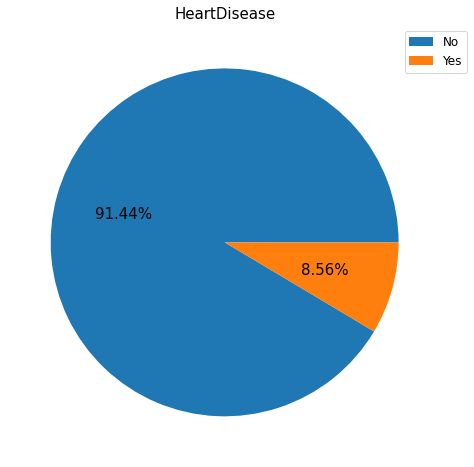

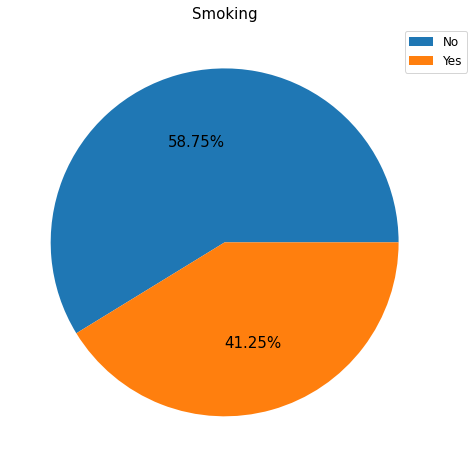

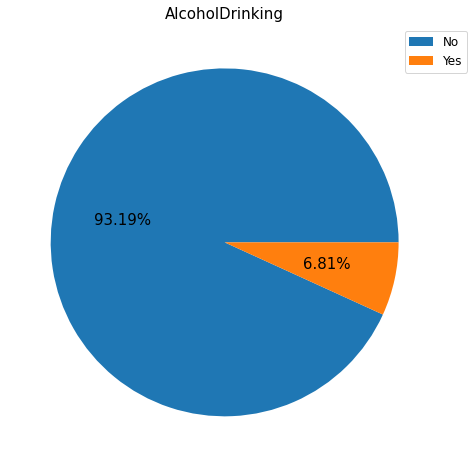

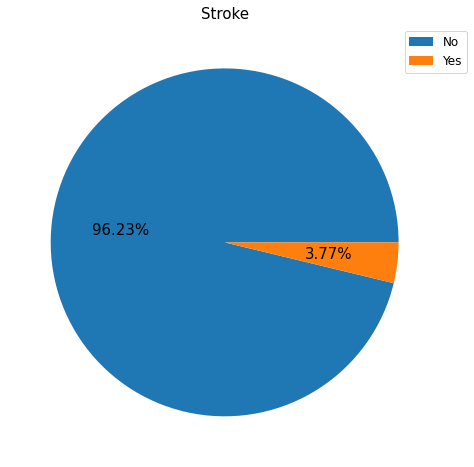

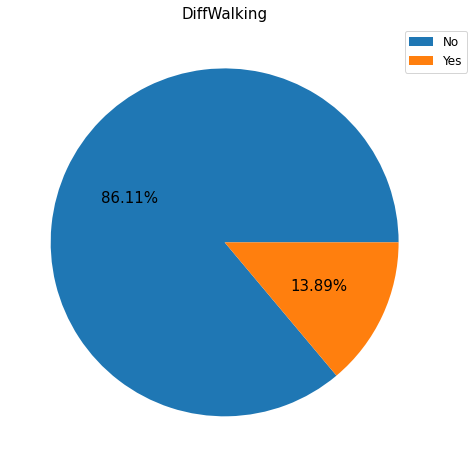

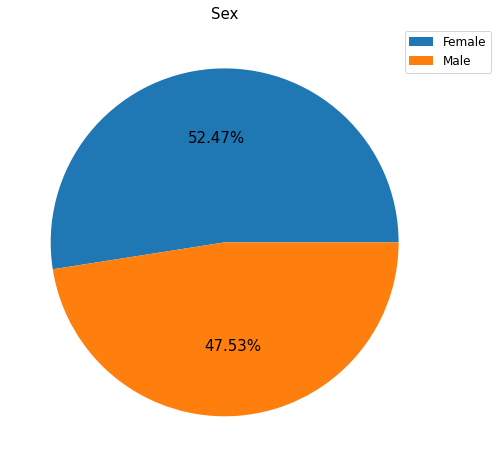

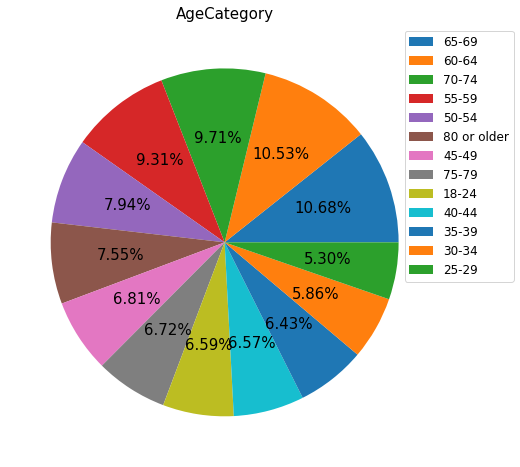

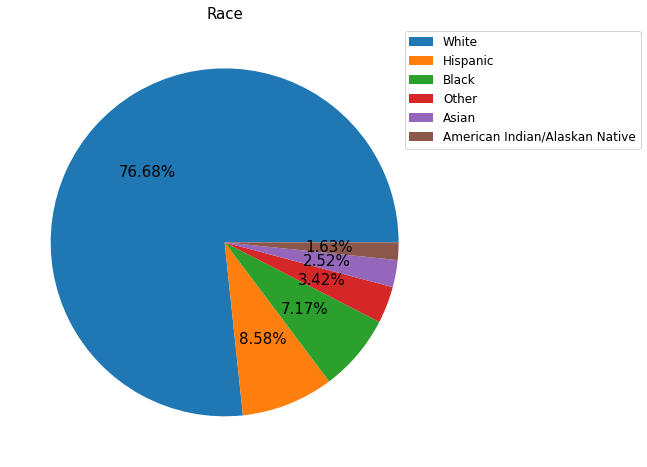

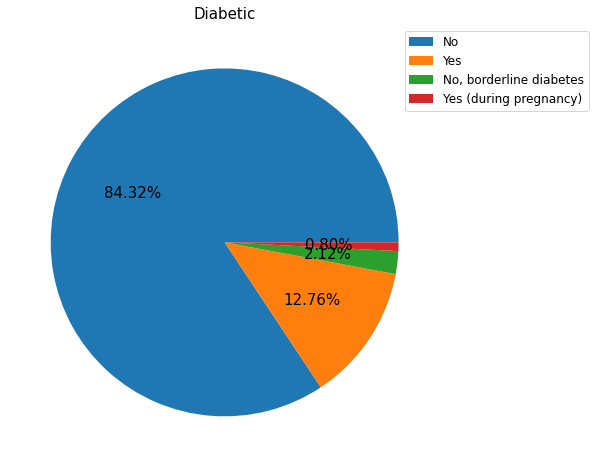

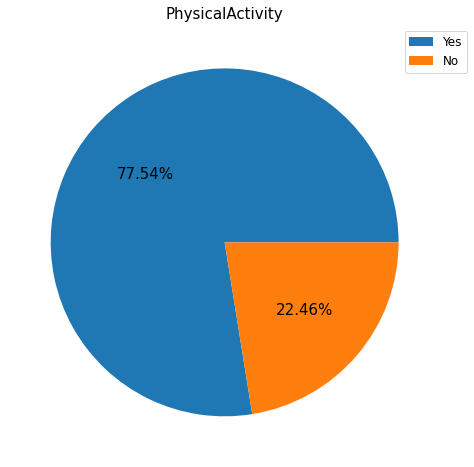

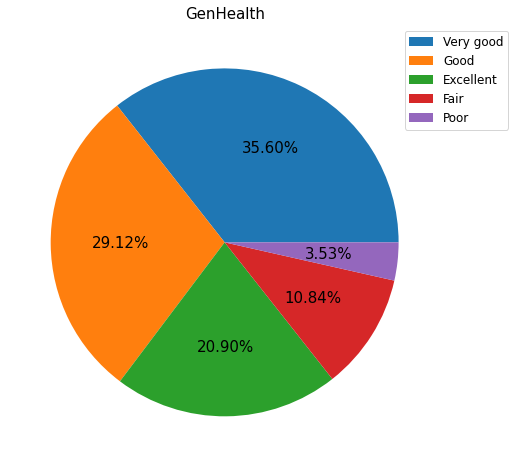

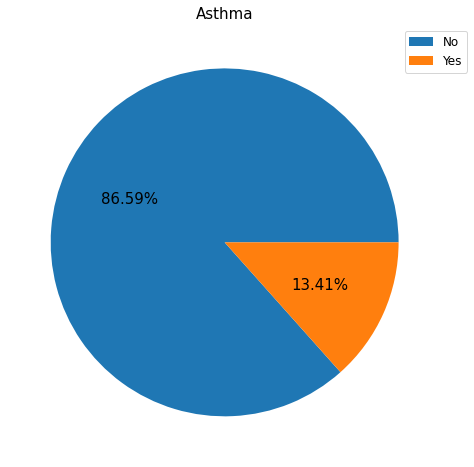

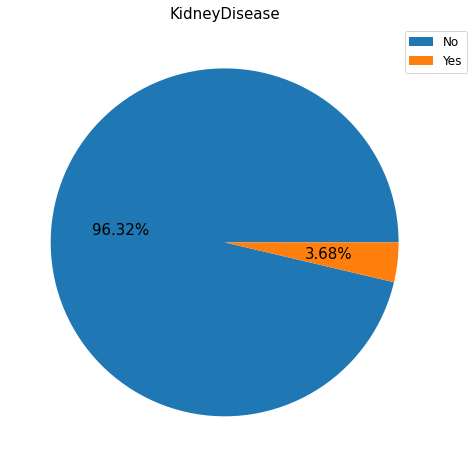

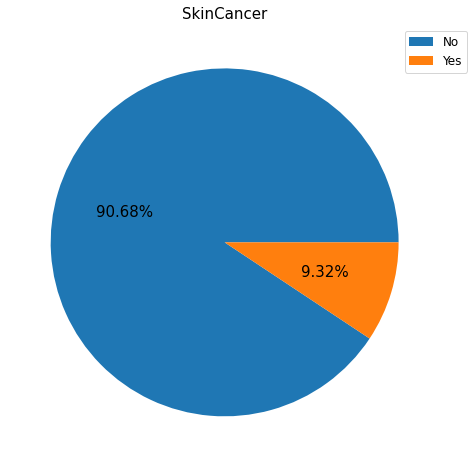

In [17]:
## hacemos un diagrama de pastel con la cantidad de datos que hay por variable
def draw_pie(list_name_feature):
    indice = 0
    for name_feature in list_name_feature:
        fig,axes = plt.subplots(figsize=(8,8))
        textprops = {"fontsize":15}
        axes.pie(df[name_feature].value_counts(),autopct='%1.2f%%',
                    textprops=textprops)
        axes.set_title(name_feature,fontsize=15)
        axes.legend(df[name_feature].value_counts().index,fontsize=12,bbox_to_anchor=(0.9,0,0.01,1))
        
        indice += 1
        
    plt.show() 
    
    return
draw_pie(df_categorico.columns)

## Variables numericas:

* BMI
* PhysicalHealth
* MentalHealth
* SleepTime

In [18]:
## extraemos las variable numericas
df_numerico=df.select_dtypes(include=["float64"])
df_numerico.head(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
5,28.87,6.0,0.0,12.0
6,21.63,15.0,0.0,4.0
7,31.64,5.0,0.0,9.0
8,26.45,0.0,0.0,5.0
9,40.69,0.0,0.0,10.0


## Descripción de como están repartidos nuestras variables numéricas 

In [19]:
## Observamos una descripción de las mismas
df_numerico.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


## Diagrama de caja de nuestros datos numéricos
Se observa que la variable BMI tiene  una cantidad considerables de valores atípicos y las otras variables no tienen tanta cantidad de datos atípicos. Más adelante se estudiará que hacer con estos datos. 

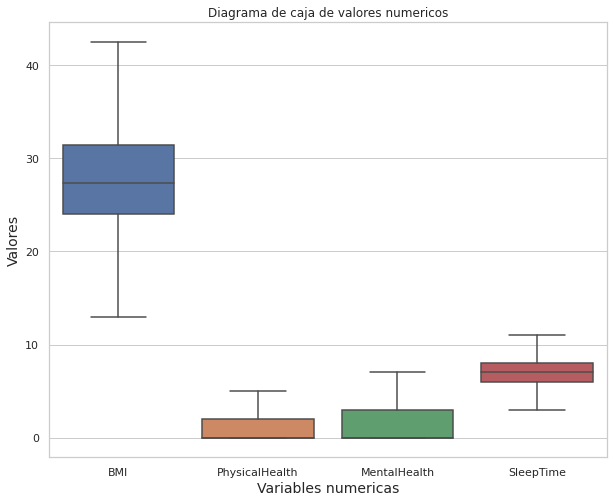

In [20]:
## Realizamos un diagrama de caja de las variables numericas
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_numerico, showfliers=False)
plt.xlabel("Variables numericas", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.title("Diagrama de caja de valores numericos")
plt.show()

## Matriz de correlación de nuestros datos numéricos
Se nota que las variables no tienen mucha relación entre ellas y ninguna aporta la misma información que otra, por lo que todas son importantes en un principio para el entrenamiento del modelo.

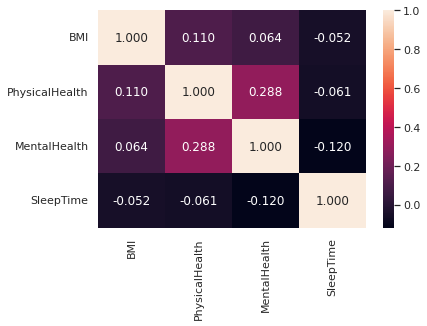

In [21]:
corr_list=["BMI","PhysicalHealth","MentalHealth","SleepTime"]
sns.heatmap(df[corr_list].corr(),annot=True,fmt=".3f");

# Relación de las variables con respecto a ataques al corazón
Tenemos un dataset desbalanceado, se busca predecir si una persona ha padecido de ataques cardíacos respecto a una serie de características que posee la persona, los datos están repartidos de la siguiente manera 91.44% de los datos son de personas que no han padecido de ataques cardíacos y 8.56% de los datos son de personas que han padecido de ataques cardíacos. Por lo que podemos deducir que sufrir un ataque cardíaco no es un sueceso común. En este análisis de la influencia de las variables en los ataques cardíacos, se enfocará más por ver las personas que sufren el padecimiento y si tuvieron ataques cardíacos o no.

In [22]:
hd_yes=df[df["HeartDisease"]=="Yes"].sample(n=10000,random_state=42)
hd_no=df[df["HeartDisease"]=="No"].sample(n=10000,random_state=42)
sample=pd.concat([hd_no,hd_yes])
sample

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
111390,No,25.02,No,No,No,0.0,7.0,No,Female,50-54,White,No,Yes,Good,6.0,Yes,No,Yes
250162,No,23.30,No,No,No,0.0,0.0,No,Female,50-54,Black,No,Yes,Good,7.0,No,No,No
230713,No,25.77,Yes,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Very good,4.0,Yes,No,No
153210,No,25.61,Yes,Yes,Yes,2.0,30.0,No,Female,25-29,White,Yes,No,Fair,6.0,No,No,No
149117,No,31.16,Yes,No,No,0.0,0.0,Yes,Female,65-69,Black,No,Yes,Fair,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256785,Yes,27.75,No,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Very good,7.0,No,No,No
68312,Yes,28.34,No,No,No,7.0,0.0,No,Female,80 or older,White,No,Yes,Very good,6.0,No,No,No
44883,Yes,30.52,Yes,No,No,2.0,0.0,No,Male,55-59,White,No,Yes,Very good,8.0,No,No,No
174158,Yes,47.93,No,No,No,20.0,0.0,Yes,Female,55-59,White,No,Yes,Good,6.0,No,Yes,Yes


## AlcoholDrinking vs HeartDisease
En esta gráfica se puede observar la cantidad de personas que beben alcohol o no, con respecto a si han padecido de ataques cardíacos o no. A partir de la gráfica podemos concluir que el consumo de alcohol no es un factor determinante para definir que una persona haya sufrido un ataque cardíaco.

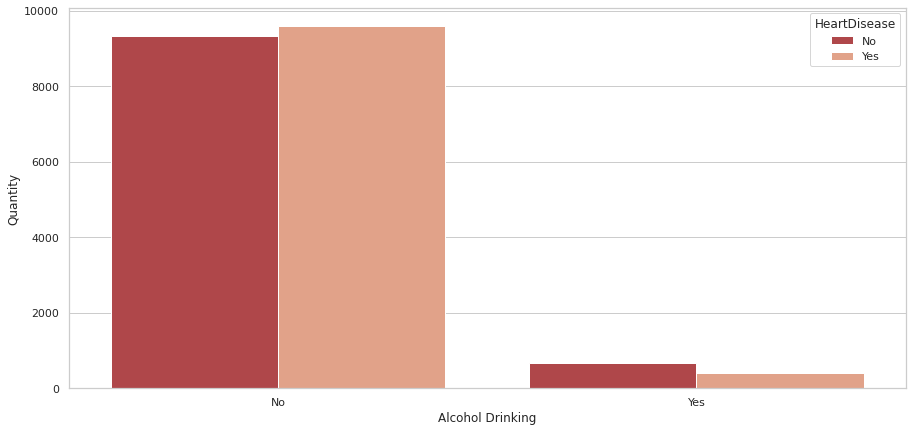

In [23]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="AlcoholDrinking",hue="HeartDisease")
plt.xlabel("Alcohol Drinking")
plt.ylabel("Quantity")
plt.show()

## Stroke vs HeartDisease
En esta gráfica se puede  la cantidad de personas han tenido un derrame cerebral o no, con respecto a si han padecido de ataques cardíacos o no. A partir de la gráfica se puede deducir que las personas que sufrieron de un derrame cerebral son más propensas a haber tenido un ataque cardíaco.

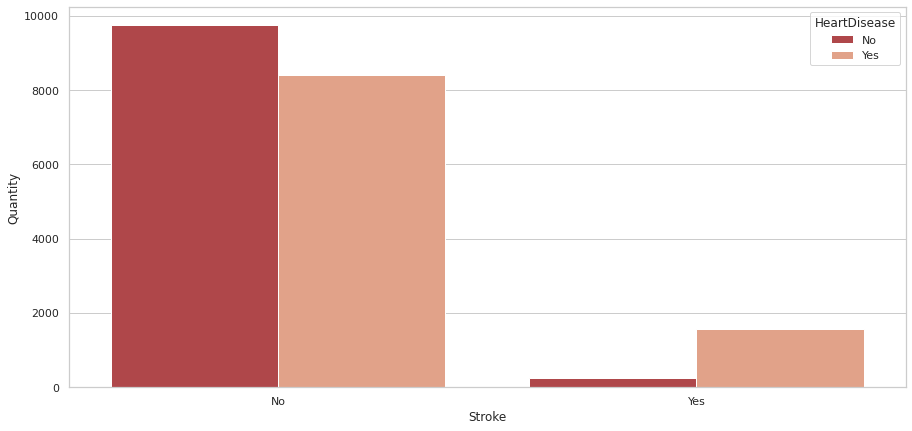

In [24]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="Stroke",hue="HeartDisease")
plt.xlabel("Stroke")
plt.ylabel("Quantity")
plt.show()

## DiffWalking vs HeartDisease
En esta gráfica se puede observar la cantidad de personas que tienen dificultad para caminar o no, con respecto a si han padecido ataques cardíacos o no. A partir de la gráfica se puede concluir que la dificultad para caminar es un factor importante para saber si una persona tuvo ataques cardíacos, porque la mayoría de personas que tienen dificultades para caminar han padecido ataques cardíacos

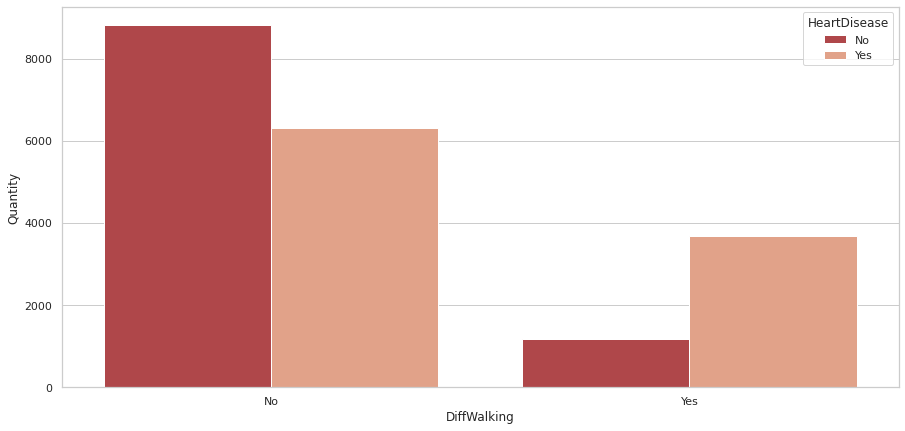

In [25]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="DiffWalking",hue="HeartDisease")
plt.xlabel("DiffWalking")
plt.ylabel("Quantity")
plt.show()

## Sex vs HeartDisease
En esta gráfica se puede observar la cantidad según su sexo (Masculino o Femenino), con respecto a si han padecido ataques cardíacos o no. Según los datos obtenidos no se puede concluir que un sexo en específico es determinante para que una persona haya tenido ataques al corazón o no, porque se puede ver en las gráficas que la cantidad de personas que tuvieron ataques al corazón están muy parejas independientemente de su sexo. A pesar de lo dicho anteriormente se ve una tendencia de que los hombres son las personas que más han sufrido de ataques cardíacos.

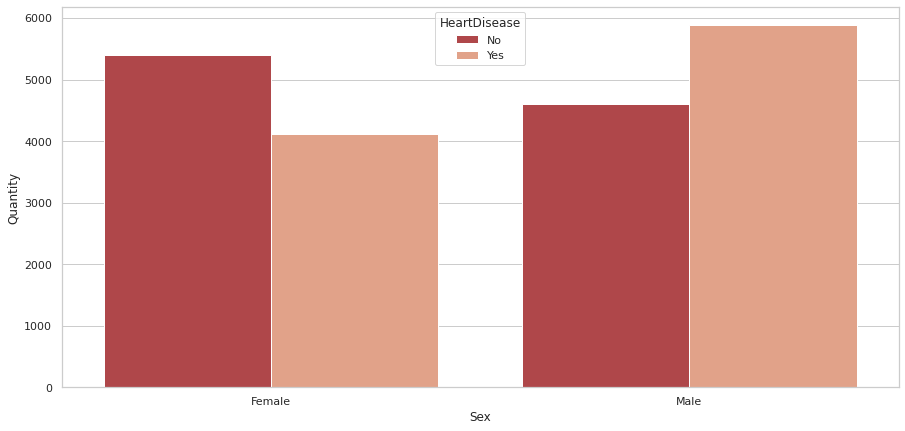

In [26]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="Sex",hue="HeartDisease")
plt.xlabel("Sex")
plt.ylabel("Quantity")
plt.show()

## AgeCategory vs HeartDisease
En esta gráfica se puede observar una la cantidad de personas según su categoría de edad y su relación con respecto a si han padecido de ataques cardíacos o no. Se puede concluir a partir de las gráficas que las personas que más han sufrido de ataques cardíacos son aquellas que pertenecen a una categoría de edad alta, lo que tiene sentido y se ha demostrado cientificamente.

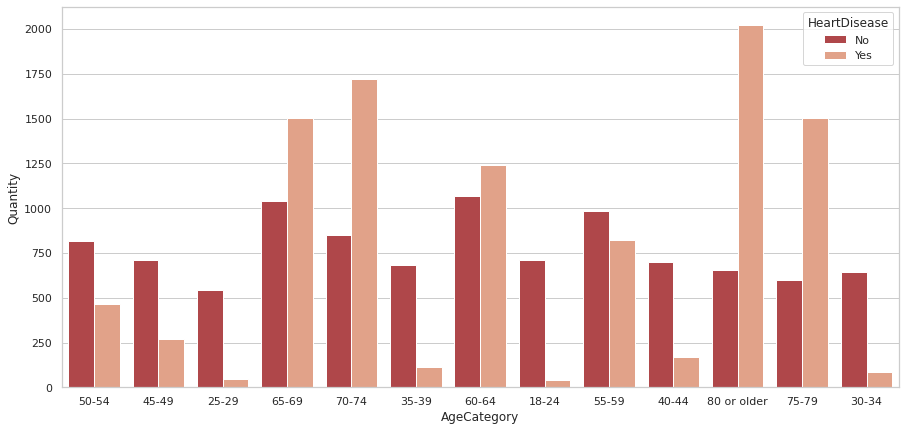

In [27]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="AgeCategory",hue="HeartDisease")
plt.xlabel("AgeCategory")
plt.ylabel("Quantity")
plt.show()

## Diabetic vs HeartDisease
En esta gráfica se puede observar una relación entre la cantidad de personas que han sufrido de diabetes o no, con respecto a si han padecido ataques cardíacos o no. Podemos observar que padecer de diabetes es un factor importante para indicarnos si una persona ha padecido un ataque cardíaco, ya que como se evidencia en la gráfica la mayoría de personas que sufrieron de diabetes han tenido ataques al corazón.

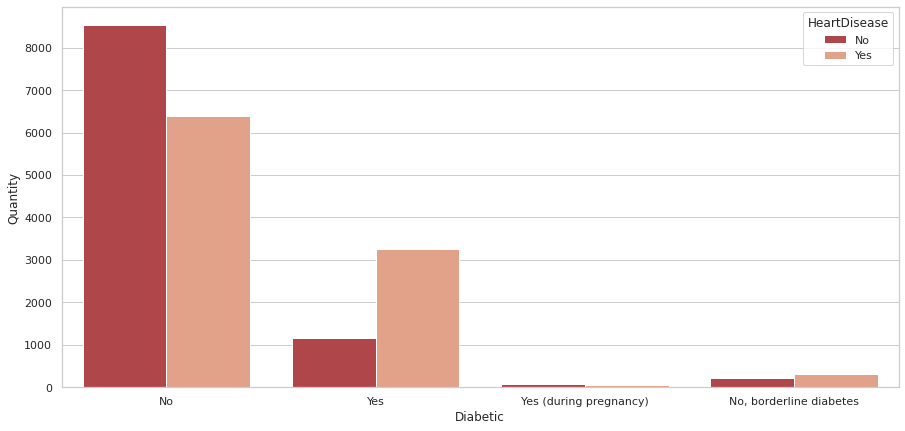

In [28]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="Diabetic",hue="HeartDisease")
plt.xlabel("Diabetic")
plt.ylabel("Quantity")
plt.show()

## GenHealth vs HeartDisease
En esta gráfica se puede observar la cantidad de personas respecto a su estado de salud, con su relación a si han padecido ataques cardíacos o no. Podemos observar que las personas que poseen un estado de salud deteriorada o con tendencias a no ser muy buena son mas propensas a haber padecido ataques cardíacos. 

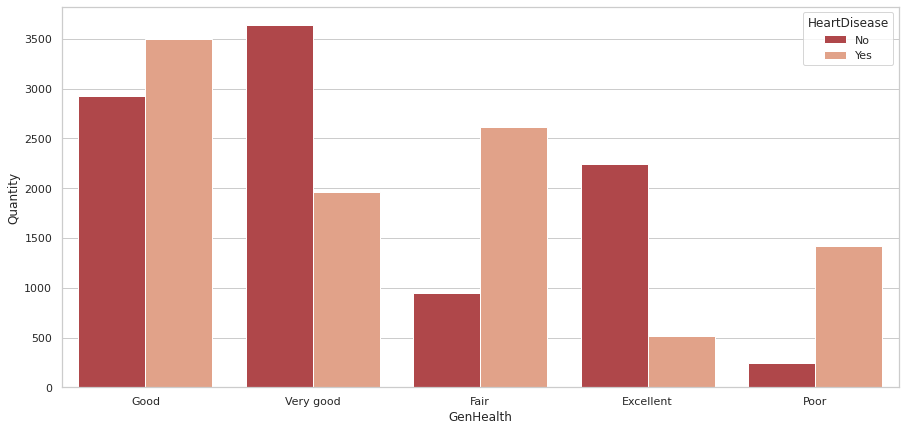

In [29]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="GenHealth",hue="HeartDisease")
plt.xlabel("GenHealth")
plt.ylabel("Quantity")
plt.show()

## Asthma vs HeartDisease
En esta gráfica se puede observar la cantidad de personas que padecen de asma , con su relación a si han padecido ataques cardíacos o no. Podemos observar que el asma no es un factor determinante para concluir que una persona ha padecido de ataques cardíacos, ya que como se observa en la gráfica no hay una diferencia muy grande entre las persnas que sufren de asma y han tenido ataques cardíacos y las que no.

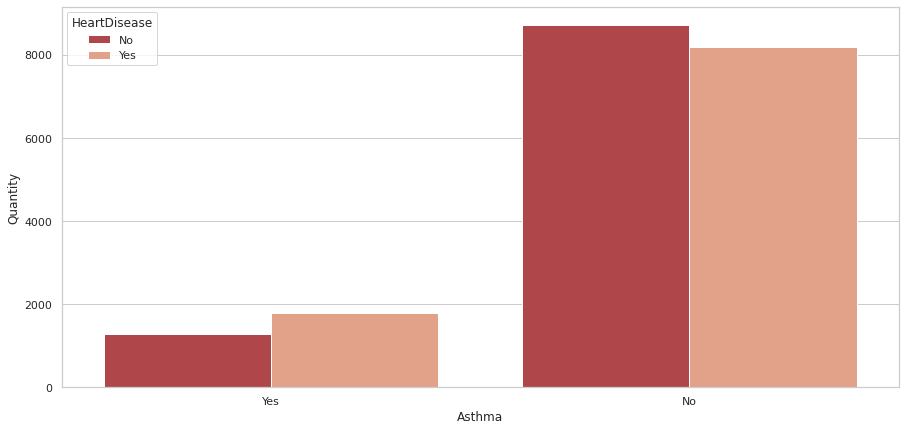

In [30]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="Asthma",hue="HeartDisease")
plt.xlabel("Asthma")
plt.ylabel("Quantity")
plt.show()

## KidneyDisease vs HeartDisease
En esta gráfica se puede observar la cantidad de personas que han padecido de enfermedades renales, con su relación a si han padecido ataques cardíacos o no. Podemos observar que padecer de enfermedades renales son indicador importante para determinar si una persona haya padecido un ataque cardíaco.

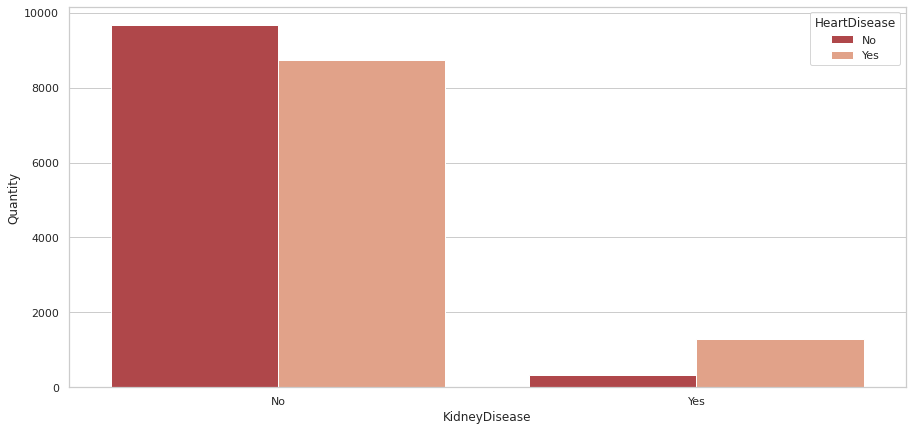

In [31]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="KidneyDisease",hue="HeartDisease")
plt.xlabel("KidneyDisease")
plt.ylabel("Quantity")
plt.show()

## SkinCancer vs HeartDisease
En esta gráfica se puede observar la cantidad de personas que han padecido cáncer de peil, con su relación a si han padecido ataques cardíacos o no. Podemos observar que el cáncer de piel es un indicador importante para determinar si una persona haya padecido un ataque cardíaco.

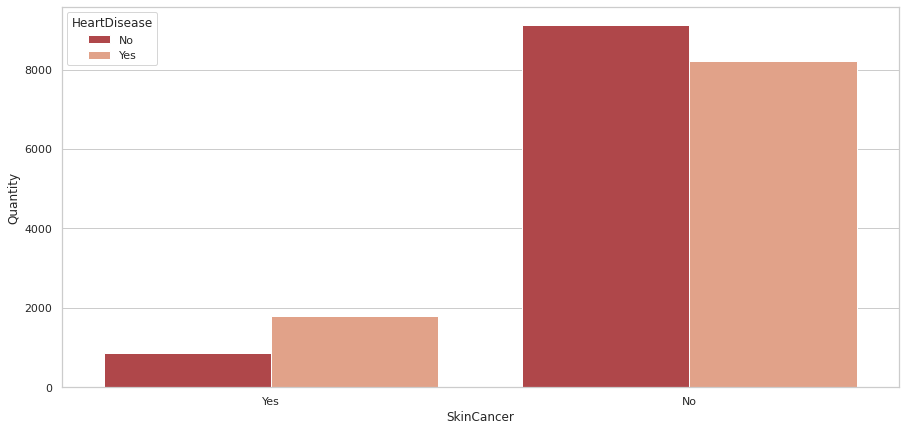

In [32]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="SkinCancer",hue="HeartDisease")
plt.xlabel("SkinCancer")
plt.ylabel("Quantity")
plt.show()

## BMI vs HeartDisease
En esta gráfica se puede observar la cantidad de personas respecto a su  IMC, con relación a si han padecido de ataques cardíacos. De esta gráfica se puede observar una tendencia leve a que las personas con mayor ICM son más propensas a padecer ataques cardíacos, que las personas que tienen un menor IMC. A pesar de eso no se puede sacar una conclusión clara  si un IMC alto o bajo influye en los ataques cardíacos, ya que los datos son algo contradictorio porque se tienen personas con un IMC alto que no han sufrido ataques del corazón, pero cientificamente está comprobado que ser gordo aumenta las probabilidades de sufrir ataques cardíacos, cosa que se puede notar en los datos, pero no se nota una tendencia clara sobre los mismos.

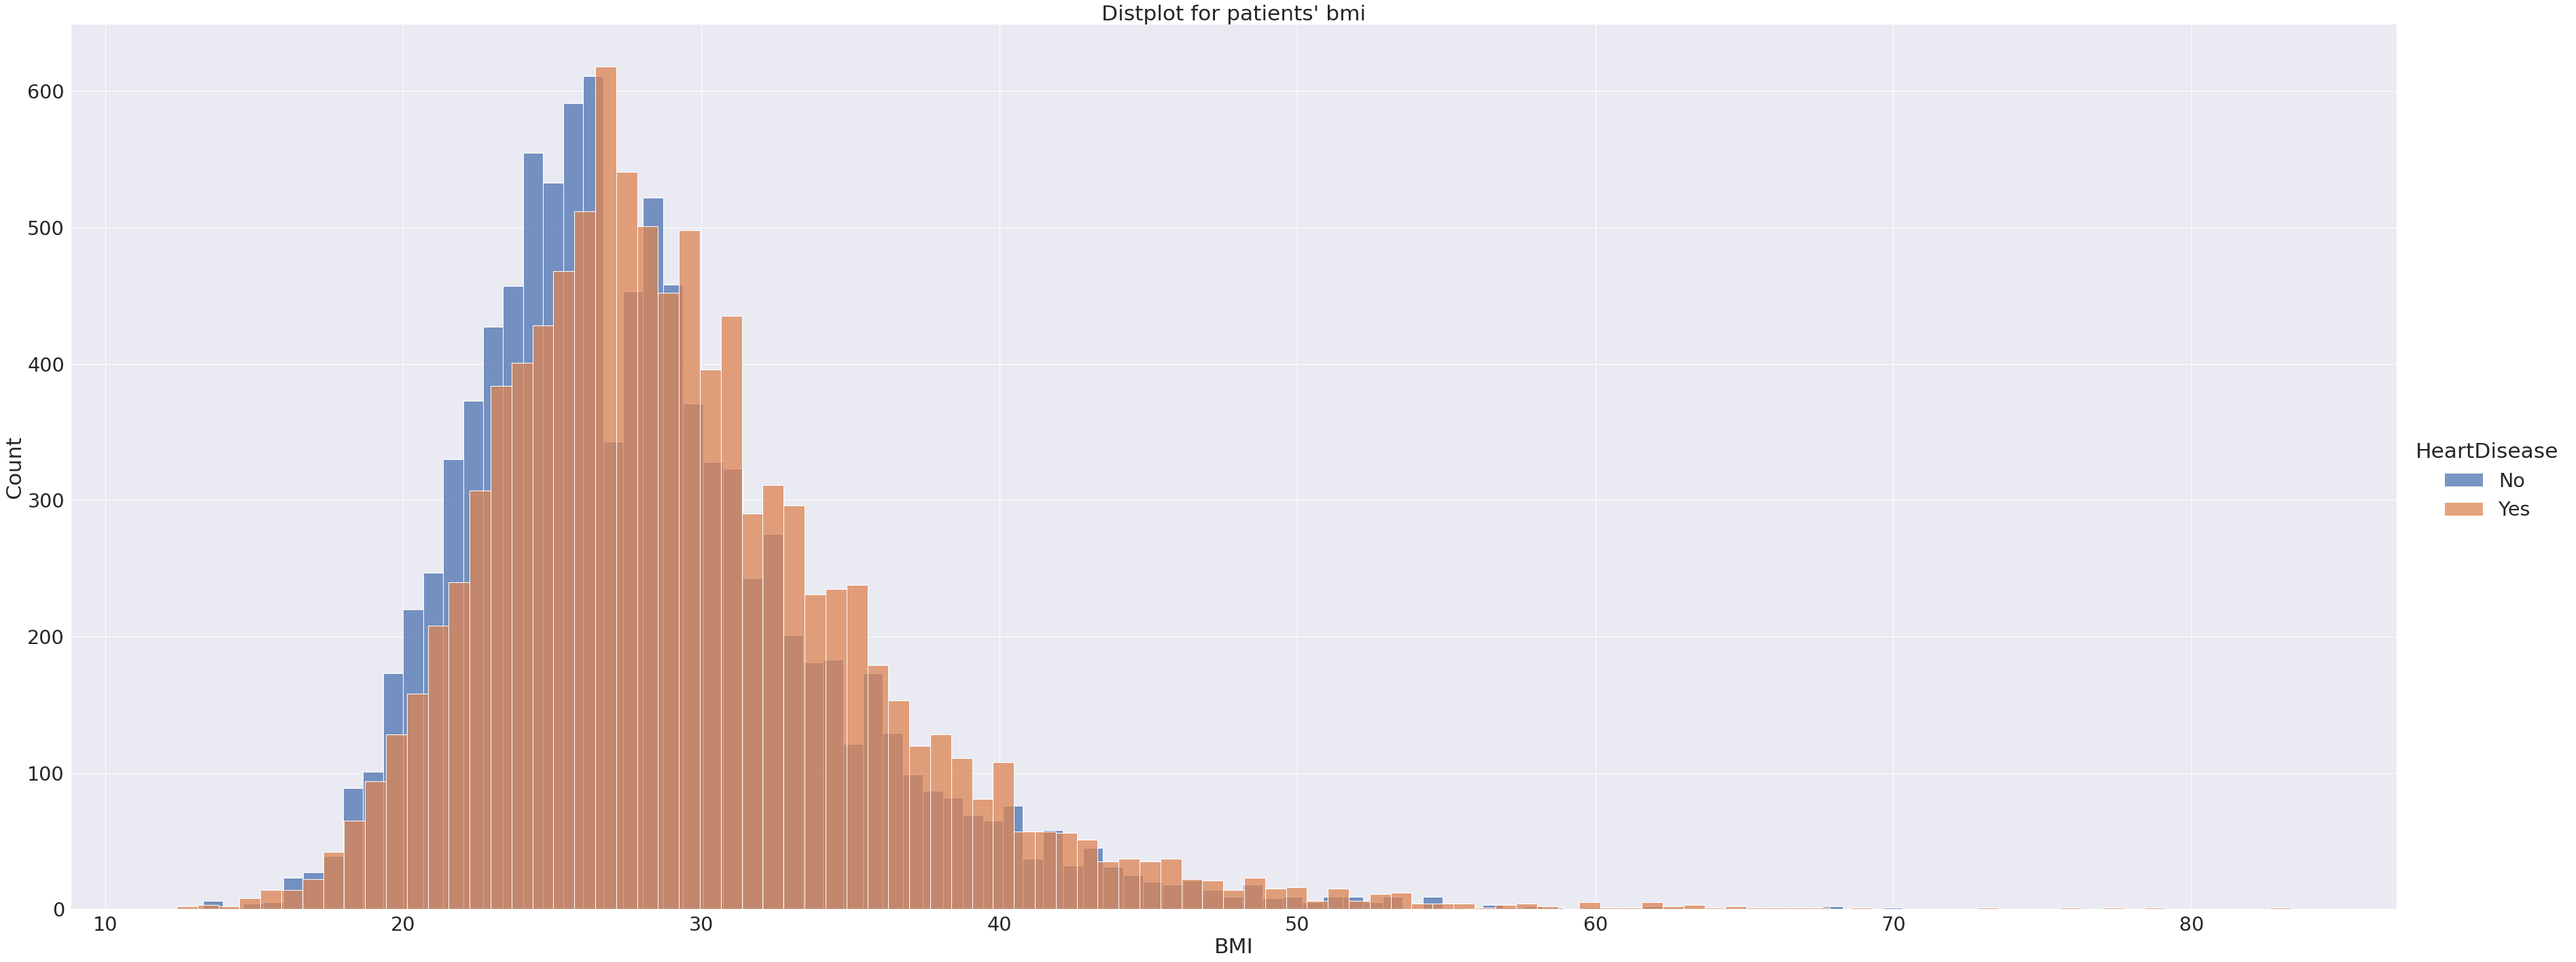

In [33]:
sns.set_palette("RdBu")
sns.set(font_scale=2.6)
sns.FacetGrid(sample, hue="HeartDisease",height=20, aspect=20/8).map(sns.histplot, "BMI").add_legend()
plt.title("Distplot for patients' bmi")
plt.show();

## PhysicalHealth vs HeartDisease
En esta gráfica se puede observar una relación entre la cantidad de personas que tuvieron ataques al corazón o no y los días que su salud física no ha estado bien durante los ultimos 30 días. Una cantidad baja de días en que la salud física no ha estado bien no nos puede dar unos indicios de que es un factor determinante para indicarnos que una persona ha sufrido ataques al corazón, ya que la cantidad de personas que sufrieron o no ataques al corazón no es muy dispareja, pero se puede notar que a mayor cantidad de días con una salud física no tan buena es más probable que la persona haya sufrido ataques al corazón.

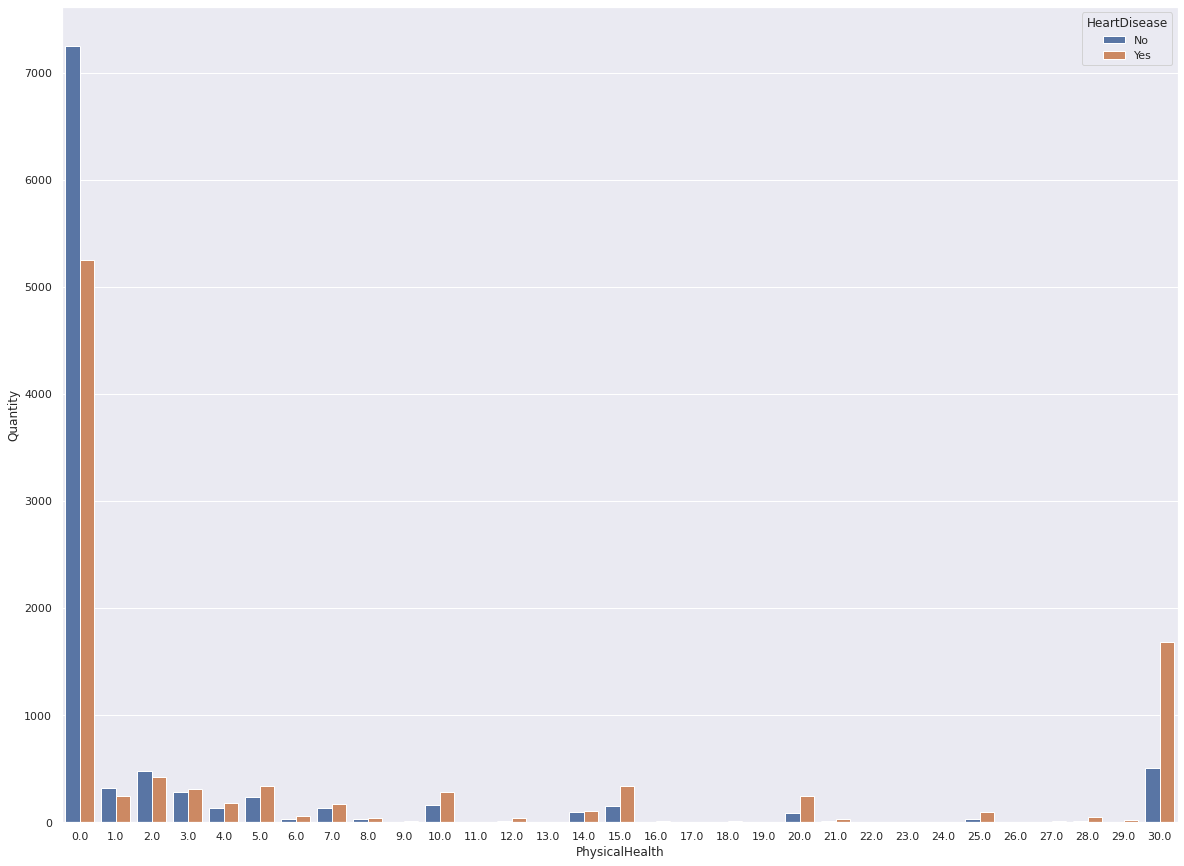

In [34]:
sns.set_palette("RdBu")
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
sns.countplot(data=sample,x="PhysicalHealth",hue="HeartDisease")
plt.xlabel("PhysicalHealth")
plt.ylabel("Quantity")
plt.show()

## MentalHealth vs HeartDisease
En esta gráfica se puede observar una relación entre la cantidad de personas que tuvieron ataques al corazón o no y los días que su salud mental no ha estado bien durante los ultimos 30 días. Una cantidad baja de días en que la salud mental no ha estado bien no nos puede dar unos indicios de que es un factor determinante para determinar que una persona ha sufrido ataques al corazón, ya que la cantidad de personas que sufrieron o no ataques al corazón no es muy dispareja, pero se puede notar que a mayor cantidad de días con una salud mental no tan buena, es más probable que la persona haya sufrido ataques al corazón.

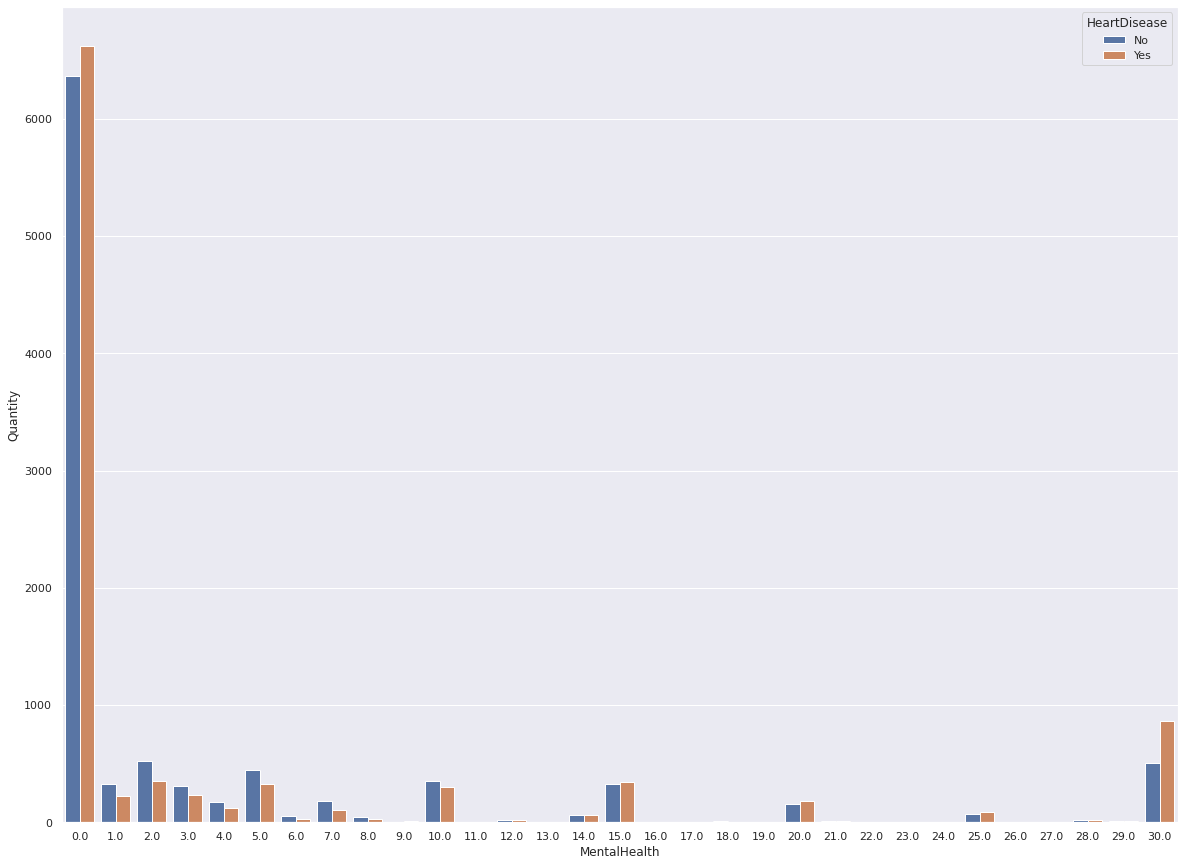

In [35]:
sns.set_palette("RdBu")
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
sns.countplot(data=sample,x="MentalHealth",hue="HeartDisease")
plt.xlabel("MentalHealth")
plt.ylabel("Quantity")
plt.show()

## SleepTime vs HeartDisease
En esta gráfica se puede observar una relación entre la cantidad de personas que tuvieron ataques al corazón o no y la cantidad de horas en promedio que duermen durante el día. Según las tendencia de los datos las personas que duermen una cantidad de horas mayor a 8 horas y menor a 6 es más probable que hubieran padecido un ataque al corazón. Un rango en el que no se encuentra una influencia de la cantidad de horas de sueño es entre 6 y 8, ya que las diferencias entre personas que tuvieron o no ataques al corazón no son tan grandes y un ataque puede ser causado por otras circunstancias.

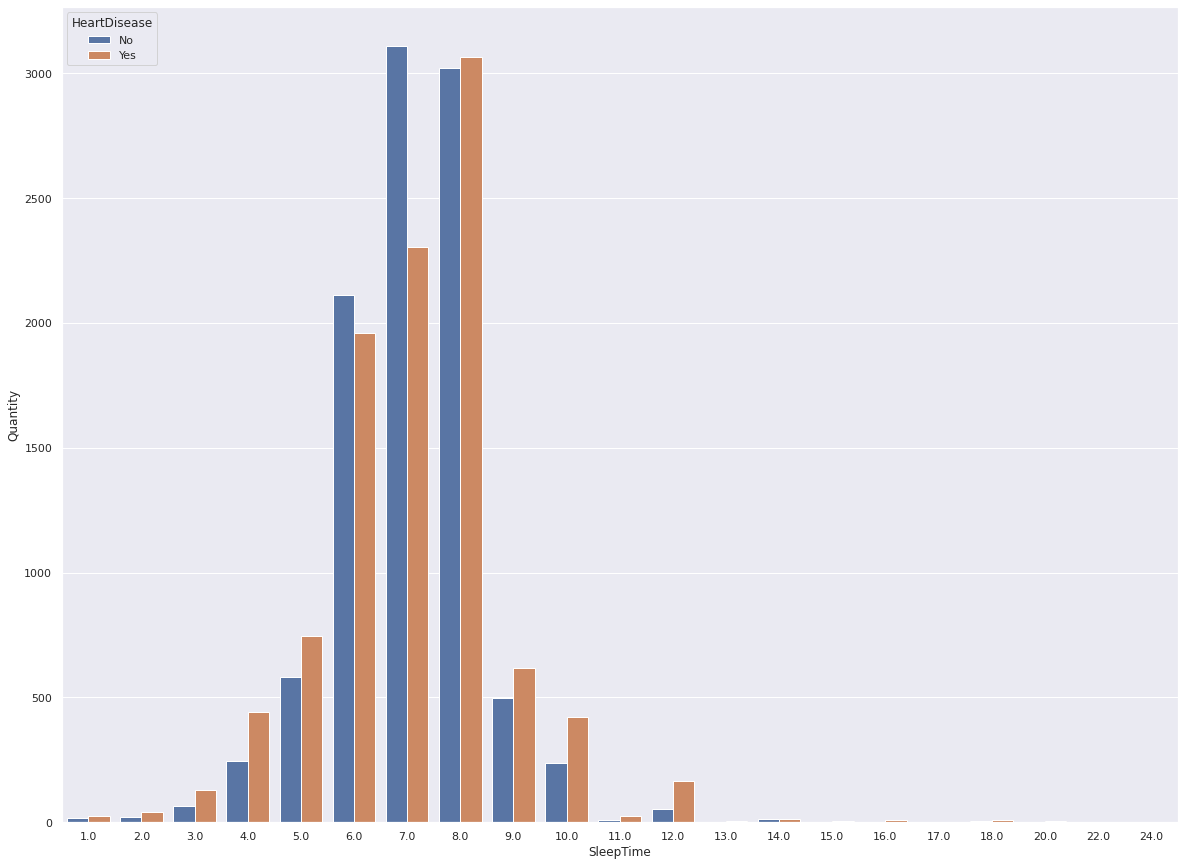

In [36]:
sns.set_palette("RdBu")
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
sns.countplot(data=sample,x="SleepTime",hue="HeartDisease")
plt.xlabel("SleepTime")
plt.ylabel("Quantity")
plt.show()

# **Datos Atípicos**

In [37]:
df_numerico.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


### **SleepTime**
El valor del límite inferior de datos en esta caracteriticas es de 3 horas de sueño y el valor del límite superior es de 11.  
Se tienen 3204 datos que superan el limite superior y 1339 que son menores que el limite inferior. Estos datos no serán eliminados porque representan más del 1% de los datos totales, por lo que pueden poseer información relevante para el problema.

<AxesSubplot:xlabel='SleepTime'>

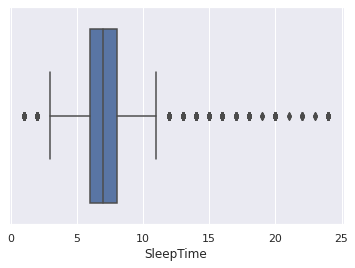

In [38]:
sleepTime=df_numerico['SleepTime']
sns.boxplot(x=sleepTime)

In [39]:
Q1=sleepTime.quantile(0.25)
Q3=sleepTime.quantile(0.75)
IQR=Q3-Q1
print("Primer cuartil: ", Q1)
print("Tercer cuartil:  ",Q3)
print("Rango intercuartílico: ", IQR)

Primer cuartil:  6.0
Tercer cuartil:   8.0
Rango intercuartílico:  2.0


In [40]:
## Valores atipicos
limite_inferior=Q1-1.5*IQR
limite_superior=Q3+1.5*IQR
print("Limite inferior: ",limite_inferior)
print("Limite superior: ",limite_superior)

Limite inferior:  3.0
Limite superior:  11.0


In [41]:
sleep_time_data=df_numerico["SleepTime"]
cantidad=sum(sleep_time_data>11)
cantidad

3204

In [42]:
sleep_time_data=df_numerico["SleepTime"]
cantidad=sum(sleep_time_data<3)
cantidad

1339

### **MentalHealth**
El valor del límite inferior de datos en esta caracteriticas es de -4.5 días y el valor del límite superior es de 7.5 días.  
Se tienen 51576 datos que superan el limite superior y 0 que son menores que el limite inferior. Estos datos no serán eliminados porque representan más del 1% de los datos totales, por lo que pueden poseer información relevante para el problema.

<AxesSubplot:xlabel='MentalHealth'>

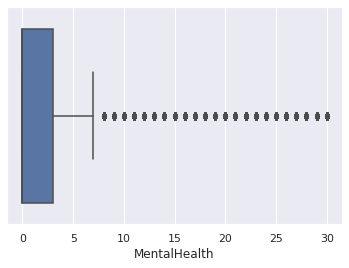

In [43]:
mentalHealth=df_numerico['MentalHealth']
sns.boxplot(x=mentalHealth)

In [44]:
Q1=mentalHealth.quantile(0.25)
Q3=mentalHealth.quantile(0.75)
IQR=Q3-Q1
print("Primer cuartil: ", Q1)
print("Tercer cuartil:  ",Q3)
print("Rango intercuartílico: ", IQR)

Primer cuartil:  0.0
Tercer cuartil:   3.0
Rango intercuartílico:  3.0


In [45]:
## Valores atipicos
limite_inferior=Q1-1.5*IQR
limite_superior=Q3+1.5*IQR
print("Limite inferior: ",limite_inferior)
print("Limite superior: ",limite_superior)

Limite inferior:  -4.5
Limite superior:  7.5


In [46]:
mental_health_data=df_numerico["MentalHealth"]
cantidad=sum(mental_health_data>7.5)
cantidad

51576

In [47]:
mental_health_data=df_numerico["MentalHealth"]
cantidad=sum(mental_health_data<-4.5)
cantidad

0

### **PhysicalHealth**
El valor del límite inferior de datos en esta caracteriticas es de -3 días y el valor del límite superior es de 5 días.
Se tienen 47146 datos que superan el limite superior y 0 que son menores que el limite inferior. Estos datos no serán eliminados porque representan más del 1% de los datos totales, por lo que pueden poseer información relevante para el problema.

<AxesSubplot:xlabel='PhysicalHealth'>

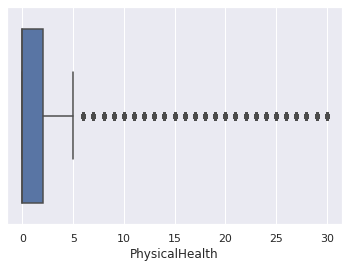

In [48]:
physicalHealth=df_numerico['PhysicalHealth']
sns.boxplot(x=physicalHealth)

In [49]:
Q1=physicalHealth.quantile(0.25)
Q3=physicalHealth.quantile(0.75)
IQR=Q3-Q1
print("Primer cuartil: ", Q1)
print("Tercer cuartil:  ",Q3)
print("Rango intercuartílico: ", IQR)

Primer cuartil:  0.0
Tercer cuartil:   2.0
Rango intercuartílico:  2.0


In [50]:
## Valores atipicos
limite_inferior=Q1-1.5*IQR
limite_superior=Q3+1.5*IQR
print("Limite inferior: ",limite_inferior)
print("Limite superior: ",limite_superior)

Limite inferior:  -3.0
Limite superior:  5.0


In [51]:
physical_health_data=df_numerico["PhysicalHealth"]
cantidad=sum(physical_health_data>5)
cantidad

47146

In [52]:
physical_health_data=df_numerico["PhysicalHealth"]
cantidad=sum(physical_health_data<-3)
cantidad

0

### **BMI**

Los datos atípicos que hay por encima del límite superior representan más del 1% de los datos, por tal motivo no son borrados. En cuanto a los datos que se encuentran por debajo del límite no es recomendable borrarlos, debido a la dispersión que presentan los datos, porque si estos son borrados van a cambiar los límites de los mismos, lo que llevaría a una situación similar provocando se descarten muhos datos hasta tener la consistencia deseada. Por los motivos presentados anteriormente se ha decidido dejar estos datos tal como los tenemos.

<AxesSubplot:xlabel='BMI'>

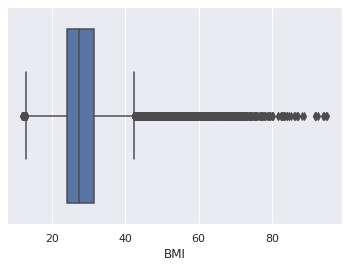

In [53]:
bmi=df_numerico['BMI']
sns.boxplot(x=bmi)

In [54]:
Q1=bmi.quantile(0.25)
Q3=bmi.quantile(0.75)
IQR=Q3-Q1
print("Primer cuartil: ", Q1)
print("Tercer cuartil:  ",Q3)
print("Rango intercuartílico: ", IQR)

Primer cuartil:  24.03
Tercer cuartil:   31.42
Rango intercuartílico:  7.390000000000001


In [55]:
## Valores atipicos
limite_inferior=Q1-1.5*IQR
limite_superior=Q3+1.5*IQR
print("Limite inferior: ",limite_inferior)
print("Limite superior: ",limite_superior)

Limite inferior:  12.945
Limite superior:  42.505


In [56]:
bmi_data=df_numerico["BMI"]
cantidad=sum(bmi_data>42.505)
cantidad

10351

In [57]:
bmi_data=df_numerico["BMI"]
cantidad=sum(bmi_data<12.945)
cantidad

45